<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Computer_Vision_and_Image_Processing/blob/main/CSE428_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression, Digit Classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_digits(n_class=2)

In [3]:
X = data['data']
y = data['target']

print("shape of X =", X.shape)
print("shape of y =", y.shape)
print("feature names:", data["feature_names"])

shape of X = (360, 64)
shape of y = (360,)
feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [4]:
df = pd.DataFrame(X, columns=data["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0
4,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0


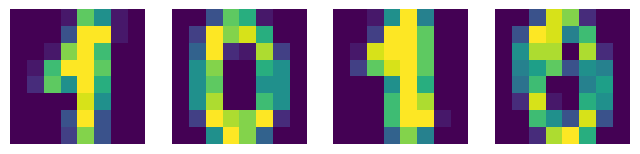

In [5]:
import random
from skimage import io

random.seed(382)
plt.figure(figsize=(8,8))
for i, img in enumerate(random.choices(data["images"], k=4)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [9]:
# Normalize the dataset to the range [0,1]
X_norm = preprocessing.minmax_scale(X)

# Convert the normalized data to a dataframe
df = pd.DataFrame(X_norm, columns=data["feature_names"])

# Visualize the first 10 rows of the dataframe
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.428571,0.8125,0.600000,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.6875,1.000000,0.6250,0.0000,0.0
2,0.0,0.0,0.0625,0.5625,0.9375,0.6875,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.071429,0.6250,0.800000,0.1875,0.0000,0.0
3,0.0,0.0,0.0000,0.0000,0.8750,0.8125,0.090909,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0625,0.800000,1.0000,0.0625,0.0
4,0.0,0.0,0.1875,0.8125,0.6875,0.4375,0.000000,0.0,0.0,0.0,...,0.0625,0.0,0.0,0.0,0.142857,0.7500,0.800000,0.2500,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.0,0.0625,0.7500,0.6250,0.1875,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.071429,0.4375,0.733333,0.6250,0.0000,0.0
356,0.0,0.0,0.5000,0.7500,0.6875,0.3750,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.285714,0.6875,0.733333,0.4375,0.0000,0.0
357,0.0,0.0,0.3125,1.0000,0.6250,0.0000,0.000000,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.285714,0.9375,1.000000,0.5000,0.0625,0.0
358,0.0,0.0,0.3750,0.7500,0.7500,0.3750,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.142857,0.6875,0.600000,0.2500,0.0000,0.0


In [10]:
# Split the normalized datasets (train, test by 80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [11]:
# Define the model
model = linear_model.LogisticRegression()

# Train the model
model = model.fit(X_train, y_train)

# Predict y_train
y_train_predict = model.predict(X_train)

# Predict y_test
y_test_predict = model.predict(X_test)

acc_training = np.mean(y_train == y_train_predict)*100
acc_testing = np.mean(y_test == y_test_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 100.0
Testing accuracy (%) = 100.0
